In [3]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import re
import pickle
import ipywidgets as widgets
from IPython.display import display, clear_output
%config InlineBackend.figure_format = 'svg'

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
!git clone https://github.com/BobAdamsEE/SouthParkData

Cloning into 'SouthParkData'...
remote: Enumerating objects: 3855, done.
remote: Total 3855 (delta 0), reused 0 (delta 0), pack-reused 3855 (from 1)
Receiving objects: 100% (3855/3855), 5.12 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [6]:
import pandas
import re
import nltk

In [7]:
csv_data = pandas.read_csv('/content/SouthParkData/All-seasons.csv')

In [8]:
csv_data

Season Episode Character  \
0         10       1      Stan   
1         10       1      Kyle   
2         10       1      Stan   
3         10       1      Chef   
4         10       1      Stan   
...      ...     ...       ...   
70891      9      14      Stan   
70892      9      14     Randy   
70893      9      14      Stan   
70894      9      14     Randy   
70895      9      14      Stan   

                                                    Line  
0             You guys, you guys! Chef is going away. \n  
1                            Going away? For how long?\n  
2                                             Forever.\n  
3                                      I'm sorry boys.\n  
4      Chef said he's been bored, so he joining a gro...  
...                                                  ...  
70891                       I think you're pushing it.\n  
70892                                How about twenty?\n  
70893                           That's not disciprine.\n  
70894                   Right right. Does vodka count?\n  
70895                                             Dad!\n  

[70896 rows x 4 columns]

In [9]:
corpus = ' '.join(csv_data['Line'].dropna().astype(str))

In [ ]:
corpus

'You guys, you guys! Chef is going away. \n Going away? For how long?\n Forever.\n I\'m sorry boys.\n Chef said he\'s been bored, so he joining a group called the Super Adventure Club. \n Wow!\n Chef?? What kind of questions do you think adventuring around the world is gonna answer?!\n What\'s the meaning of life? Why are we here?\n I hope you\'re making the right choice.\n I\'m gonna miss him.  I\'m gonna miss Chef and I...and I don\'t know how to tell him! \n Dude, how are we gonna go on? Chef was our fuh...f-ffriend. \n And we will all miss you, Chef,  but we know you must do what your heart tells you..\n Bye-bye!\n Good-bye!\n So long!\n So long, Chef!\n Good-bye, Chef!\n Good-bye, Chef! Have a great time with the Super Adventure Club!\n Good-bye! ..\n Draw two card, fatass.\n Reverse to you, Jew. \n I\'ll get it. \n Hello there, children!\n He\'s back!\n Yeah!\n All right! \n Chef! I can\'t believe you\'re back!\n Well, it\'s true.\n But are you back for good?\n That\'s right.\n H

In [10]:
def tokenize(corpus):
    """
    Токенізує та очищає текстовий корпус.

    Args:
        corpus: Рядок тексту для обробки

    Returns:
        Список токенів (слів)
    """
    # Заміна знаків пунктуації на крапки
    data = re.sub(r'[,!?;-]+', '.', corpus)
    # Токенізація рядка на слова
    data = nltk.word_tokenize(data)
    # Перетворення на нижній регістр та видалення не-алфавітних токенів
    data = [ch.lower() for ch in data if ch.isalpha() or ch == '.']
    return data


In [11]:
tcorpus = tokenize(corpus)

In [ ]:
tcorpus

['you',
 'guys',
 '.',
 'you',
 'guys',
 '.',
 'chef',
 'is',
 'going',
 'away',
 '.',
 'going',
 'away',
 '.',
 'for',
 'how',
 'long',
 '.',
 'forever',
 '.',
 'i',
 'sorry',
 'boys',
 '.',
 'chef',
 'said',
 'he',
 'been',
 'bored',
 '.',
 'so',
 'he',
 'joining',
 'a',
 'group',
 'called',
 'the',
 'super',
 'adventure',
 'club',
 '.',
 'wow',
 '.',
 'chef',
 '.',
 'what',
 'kind',
 'of',
 'questions',
 'do',
 'you',
 'think',
 'adventuring',
 'around',
 'the',
 'world',
 'is',
 'gon',
 'na',
 'answer',
 '.',
 'what',
 'the',
 'meaning',
 'of',
 'life',
 '.',
 'why',
 'are',
 'we',
 'here',
 '.',
 'i',
 'hope',
 'you',
 'making',
 'the',
 'right',
 'choice',
 '.',
 'i',
 'gon',
 'na',
 'miss',
 'him',
 '.',
 'i',
 'gon',
 'na',
 'miss',
 'chef',
 'and',
 'i',
 'and',
 'i',
 'do',
 'know',
 'how',
 'to',
 'tell',
 'him',
 '.',
 'dude',
 '.',
 'how',
 'are',
 'we',
 'gon',
 'na',
 'go',
 'on',
 '.',
 'chef',
 'was',
 'our',
 'fuh',
 '.',
 'and',
 'we',
 'will',
 'all',
 'miss',
 'you

In [12]:
def get_dict(data):
    """
    Створює словники для конвертації слів в індекси та навпаки.

    Args:
        data: Список токенів

    Returns:
        word2Ind: Словник {слово: індекс}
        Ind2word: Словник {індекс: слово}
    """
    words = sorted(list(set(data)))
    word2Ind = {}
    Ind2word = {}
    for idx, word in enumerate(words):
        word2Ind[word] = idx
        Ind2word[idx] = word
    return word2Ind, Ind2word


In [13]:
word2Ind, Ind2word = get_dict(tcorpus)

In [ ]:
word2Ind

{'.': 0,
 'a': 1,
 'aa': 2,
 'aaa': 3,
 'aaaa': 4,
 'aaaaa': 5,
 'aaaaaa': 6,
 'aaaaaaa': 7,
 'aaaaaaaa': 8,
 'aaaaaaaaa': 9,
 'aaaaaaaaaa': 10,
 'aaaaaaaaaaa': 11,
 'aaaaaaaaaaaa': 12,
 'aaaaaaaaaaaaa': 13,
 'aaaaaaaaaaaaaa': 14,
 'aaaaaaaaaaaaaaa': 15,
 'aaaaaaaaaaaaaaaa': 16,
 'aaaaaaaaaaaaaaaaa': 17,
 'aaaaaaaaaaaaaaaaaaa': 18,
 'aaaaaaaaaaaaaaaaaaaa': 19,
 'aaaaaaaaaaaaaaaaaaaaaaa': 20,
 'aaaaaaaaaaaaaaaaaaaaaaaa': 21,
 'aaaaaaaaaaaaaaaaaaaaaaaaaa': 22,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 23,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaah': 24,
 'aaaaaaaaaaaaaaaaaaaaah': 25,
 'aaaaaaaaaaaaaaaaaaaah': 26,
 'aaaaaaaaaaaaaaaah': 27,
 'aaaaaaaaaaaaaaaahhh': 28,
 'aaaaaaaaaaaaaaahhhhh': 29,
 'aaaaaaaaaaaaaah': 30,
 'aaaaaaaaaaaaah': 31,
 'aaaaaaaaaaaah': 32,
 'aaaaaaaaaaaahh': 33,
 'aaaaaaaaaaah': 34,
 'aaaaaaaaaah': 35,
 'aaaaaaaaah': 36,
 'aaaaaaaah': 37,
 'aaaaaaaargh': 38,
 'aaaaaaaarrgh': 39,
 'aaaaaaah': 40,
 'aaaaaaahh': 41,
 'aaaaaaahhhh': 42,
 'aaaaaagh': 43,
 'aaaaaah': 44,
 'aaaaaahahah'

In [ ]:
Ind2word

{0: '.',
 1: 'a',
 2: 'aa',
 3: 'aaa',
 4: 'aaaa',
 5: 'aaaaa',
 6: 'aaaaaa',
 7: 'aaaaaaa',
 8: 'aaaaaaaa',
 9: 'aaaaaaaaa',
 10: 'aaaaaaaaaa',
 11: 'aaaaaaaaaaa',
 12: 'aaaaaaaaaaaa',
 13: 'aaaaaaaaaaaaa',
 14: 'aaaaaaaaaaaaaa',
 15: 'aaaaaaaaaaaaaaa',
 16: 'aaaaaaaaaaaaaaaa',
 17: 'aaaaaaaaaaaaaaaaa',
 18: 'aaaaaaaaaaaaaaaaaaa',
 19: 'aaaaaaaaaaaaaaaaaaaa',
 20: 'aaaaaaaaaaaaaaaaaaaaaaa',
 21: 'aaaaaaaaaaaaaaaaaaaaaaaa',
 22: 'aaaaaaaaaaaaaaaaaaaaaaaaaa',
 23: 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 24: 'aaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 25: 'aaaaaaaaaaaaaaaaaaaaah',
 26: 'aaaaaaaaaaaaaaaaaaaah',
 27: 'aaaaaaaaaaaaaaaah',
 28: 'aaaaaaaaaaaaaaaahhh',
 29: 'aaaaaaaaaaaaaaahhhhh',
 30: 'aaaaaaaaaaaaaah',
 31: 'aaaaaaaaaaaaah',
 32: 'aaaaaaaaaaaah',
 33: 'aaaaaaaaaaaahh',
 34: 'aaaaaaaaaaah',
 35: 'aaaaaaaaaah',
 36: 'aaaaaaaaah',
 37: 'aaaaaaaah',
 38: 'aaaaaaaargh',
 39: 'aaaaaaaarrgh',
 40: 'aaaaaaah',
 41: 'aaaaaaahh',
 42: 'aaaaaaahhhh',
 43: 'aaaaaagh',
 44: 'aaaaaah',
 45: 'aaaaaaha

In [14]:
def get_windows(words, C):
    """
    Створює ковзне вікно для формування пар (контекстні слова, центральне слово).

    Args:
        words: Список токенів
        C: Половина розміру вікна контексту

    Yields:
        Кортеж (контекстні слова, центральне слово)
    """
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i+1):(i+C+1)]
        yield context_words, center_word
        i += 1


In [15]:
for context, center in get_windows(tcorpus, 4):
    print("Mid:", center)
    print("Context:", context)
    break

Mid: guys
Context: ['you', 'guys', '.', 'you', '.', 'chef', 'is', 'going']


In [17]:
for context, center in get_windows(tcorpus, 5):
    print("Mid:", center)
    print("Context:", context)
    break

Mid: .
Context: ['you', 'guys', '.', 'you', 'guys', 'chef', 'is', 'going', 'away', '.']


In [16]:
for context, center in get_windows(tcorpus, 3):
    print("Mid:", center)
    print("Context:", context)

Выходные данные были обрезаны до нескольких последних строк (5000).
Mid: .
Context: ['all', 'of', 'america', 'the', 'boy', 'in']
Mid: the
Context: ['of', 'america', '.', 'boy', 'in', 'the']
Mid: boy
Context: ['america', '.', 'the', 'in', 'the', 'video']
Mid: in
Context: ['.', 'the', 'boy', 'the', 'video', '.']
Mid: the
Context: ['the', 'boy', 'in', 'video', '.', 'referred']
Mid: video
Context: ['boy', 'in', 'the', '.', 'referred', 'to']
Mid: .
Context: ['in', 'the', 'video', 'referred', 'to', 'by']
Mid: referred
Context: ['the', 'video', '.', 'to', 'by', 'most']
Mid: to
Context: ['video', '.', 'referred', 'by', 'most', 'as']
Mid: by
Context: ['.', 'referred', 'to', 'most', 'as', 'that']
Mid: most
Context: ['referred', 'to', 'by', 'as', 'that', 'little']
Mid: as
Context: ['to', 'by', 'most', 'that', 'little', 'gay']
Mid: that
Context: ['by', 'most', 'as', 'little', 'gay', 'kid']
Mid: little
Context: ['most', 'as', 'that', 'gay', 'kid', '.']
Mid: gay
Context: ['as', 'that', 'little', 'ki

KeyboardInterrupt: 

In [18]:
def word_to_one_hot_vector(word, word2Ind, V):
    """
    Перетворює слово на one-hot вектор.

    Args:
        word: Слово для кодування
        word2Ind: Словник {слово: індекс}
        V: Розмір словника

    Returns:
        One-hot вектор слова
    """
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    return one_hot_vector


In [19]:
word_to_one_hot_vector('guys', word2Ind, len(word2Ind))

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
vec = word_to_one_hot_vector('you', word2Ind, len(word2Ind))

In [21]:
vec

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
np.argmax(vec)

np.int64(23686)

In [23]:
print("Index:", word2Ind['you'])
print("Test index:", np.argmax(vec))
print("Value:", vec[word2Ind['you']])

Index: 23686
Test index: 23686
Value: 1.0


In [24]:
word_to_one_hot_vector('guys', word2Ind, len(word2Ind))

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
print("Index:", word2Ind['guys'])
print("Test index:", np.argmax(word_to_one_hot_vector('guys', word2Ind, len(word2Ind))))
print("Value:", word_to_one_hot_vector('guys', word2Ind, len(word2Ind))[word2Ind['guys']])

Index: 9042
Test index: 9042
Value: 1.0


In [26]:
def context_words_to_vector(context_words, word2Ind, V):
    """
    Перетворює список контекстних слів на їх усереднений векторний представник.

    Args:
        context_words: Список контекстних слів
        word2Ind: Словник {слово: індекс}
        V: Розмір словника

    Returns:
        Усереднений вектор контекстних слів
    """
    context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors, axis=0)
    return context_words_vectors


In [27]:
context_words = ['guys', 'you','guys', 'you']
vec2 = context_words_to_vector(context_words, word2Ind, len(word2Ind))

In [28]:
print("Shape:", vec2.shape)
print("Index of max:", np.argmax(vec2))
print("Max value:", np.max(vec2))

Shape: (23846,)
Index of max: 9042
Max value: 0.5


In [29]:
def get_training_example(words, C, word2Ind, V):
    """
    Генератор навчальних прикладів для CBOW моделі.

    Args:
        words: Список токенів
        C: Половина розміру вікна контексту
        word2Ind: Словник {слово: індекс}
        V: Розмір словника

    Yields:
        Кортеж (вектор контекстних слів, one-hot вектор центрального слова)
    """
    for context_words, center_word in get_windows(words, C):
        yield context_words_to_vector(context_words, word2Ind, V), word_to_one_hot_vector(center_word, word2Ind, V)



In [30]:
for context_vec, center_vec in get_training_example(tcorpus, 2, word2Ind, len(word2Ind)):
    print("Context vector shape:", context_vec.shape)
    print("Center word one-hot shape:", center_vec.shape)


Выходные данные были обрезаны до нескольких последних строк (5000).
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23846,)
Context vector shape: (23846,)
Center word one-hot shape: (23

KeyboardInterrupt: 

In [31]:
def get_vectors(data, word2Ind, V, C):
    """
    Генерує пари векторів (контекст, центральне слово) для навчання.

    Args:
        data: Список токенів
        word2Ind: Словник {слово: індекс}
        V: Розмір словника
        C: Половина розміру вікна контексту

    Yields:
        Кортеж (вектор контекстних слів, one-hot вектор центрального слова)
    """
    i = C
    while True:
        y = np.zeros(V)
        x = np.zeros(V)
        center_word = data[i]
        y[word2Ind[center_word]] = 1
        context_words = data[(i - C) : i] + data[(i + 1) : (i + C + 1)]
        num_ctx_words = len(context_words)
        for idx, freq in pack_idx_with_frequency(context_words, word2Ind):
            x[idx] = freq / num_ctx_words
        yield x, y
        i += 1
        if i >= len(data) - C:
            i = C

In [32]:
def get_batches(data, word2Ind, V, C, batch_size):
    """
    Генерує батчі даних для навчання.

    Args:
        data: Список токенів
        word2Ind: Словник {слово: індекс}
        V: Розмір словника
        C: Половина розміру вікна контексту
        batch_size: Розмір батчу

    Yields:
        Кортеж (матриця вхідних векторів, матриця цільових векторів)
    """
    batch_x = []
    batch_y = []
    for x, y in get_vectors(data, word2Ind, V, C):
        if len(batch_x) < batch_size:
            batch_x.append(x)
            batch_y.append(y)
        else:
            yield np.array(batch_x).T, np.array(batch_y).T
            batch_x = []
            batch_y = []


In [33]:
def pack_idx_with_frequency(context_words, word2Ind):
    """
    Підраховує частоту кожного слова в контексті.

    Args:
        context_words: Список контекстних слів
        word2Ind: Словник {слово: індекс}

    Returns:
        Список кортежів (індекс слова, частота)
    """
    freq_dict = defaultdict(int)
    for word in context_words:
        freq_dict[word] += 1
    idxs = get_idx(context_words, word2Ind)
    packed = []
    for i in range(len(idxs)):
        idx = idxs[i]
        freq = freq_dict[context_words[i]]
        packed.append((idx, freq))
    return packed

In [34]:
def get_idx(words, word2Ind):
    """
    Перетворює список слів на список індексів.

    Args:
        words: Список слів
        word2Ind: Словник {слово: індекс}

    Returns:
        Список індексів
    """
    idx = []
    for word in words:
        idx = idx + [word2Ind[word]]
    return idx

In [35]:
batches = get_batches(tcorpus ,word2Ind, len(word2Ind), 2, 32)

In [36]:
batch_x, batch_y = next(batches)

In [37]:
batch_x

array([[0.  , 0.5 , 0.5 , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [38]:
batch_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
def initialize_model(N, V, random_seed=1):
    """
    Ініціалізує ваги та зміщення моделі CBOW.

    Args:
        N: Розмірність прихованого шару (розмір векторних подань)
        V: Розмір словника
        random_seed: Значення seed для відтворюваності результатів

    Returns:
        W1, W2, b1, b2: Ініціалізовані ваги та зміщення
    """
    np.random.seed(random_seed)
    # W1 має форму (N, V)
    W1 = np.random.rand(N, V)

    # W2 має форму (V, N)
    W2 = np.random.rand(V, N)

    # b1 має форму (N, 1)
    b1 = np.random.rand(N, 1)

    # b2 має форму (V, 1)
    b2 = np.random.rand(V, 1)

    return W1, W2, b1, b2


In [40]:
W1, W2, b1, b2 = initialize_model(100, len(word2Ind))

In [41]:
print("W1:", W1.shape)
print("W2:", W2.shape)
print("b1:", b1.shape)
print("b2:", b2.shape)

W1: (100, 23846)
W2: (23846, 100)
b1: (100, 1)
b2: (23846, 1)


In [42]:
def softmax(z):
    """
    Обчислює softmax для вхідного вектора або матриці.

    Args:
        z: Вхідний вектор або матриця

    Returns:
        Результат застосування softmax
    """
    # Обчислення експоненти кожного елемента
    e_z = np.exp(z)
    # Обчислення суми по стовпцях (для кожного прикладу)
    sum_e_z = np.sum(e_z, axis=0)
    # Ділення кожного елемента на суму для отримання ймовірностей
    return e_z / sum_e_z


In [43]:
softmax(batch_x)

array([[4.19334729e-05, 6.91366087e-05, 6.91368425e-05, ...,
        5.38440092e-05, 4.19337566e-05, 4.19337566e-05],
       [4.19334729e-05, 4.19334729e-05, 4.19336147e-05, ...,
        5.38440092e-05, 5.38440092e-05, 4.19337566e-05],
       [4.19334729e-05, 4.19334729e-05, 4.19336147e-05, ...,
        4.19337566e-05, 4.19337566e-05, 4.19337566e-05],
       ...,
       [4.19334729e-05, 4.19334729e-05, 4.19336147e-05, ...,
        4.19337566e-05, 4.19337566e-05, 4.19337566e-05],
       [4.19334729e-05, 4.19334729e-05, 4.19336147e-05, ...,
        4.19337566e-05, 4.19337566e-05, 4.19337566e-05],
       [4.19334729e-05, 4.19334729e-05, 4.19336147e-05, ...,
        4.19337566e-05, 4.19337566e-05, 4.19337566e-05]])

In [44]:
softmax(batch_y)

array([[1.13984986e-04, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 4.19327329e-05],
       [4.19327329e-05, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 1.13984986e-04],
       [4.19327329e-05, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 4.19327329e-05],
       ...,
       [4.19327329e-05, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 4.19327329e-05],
       [4.19327329e-05, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 4.19327329e-05],
       [4.19327329e-05, 4.19327329e-05, 4.19327329e-05, ...,
        4.19327329e-05, 4.19327329e-05, 4.19327329e-05]])

In [45]:
def forward_prop(x, W1, W2, b1, b2):
    """
    Виконує пряме поширення в моделі CBOW.

    Args:
        x: Вхідний вектор (усереднені one-hot вектори контекстних слів)
        W1, W2, b1, b2: Ваги та зміщення моделі

    Returns:
        z: Вихідний шар перед застосуванням softmax
        h: Прихований шар після застосування ReLU
    """
    # Обчислення прихованого шару
    h = np.dot(W1, x) + b1

    # Застосування ReLU до прихованого шару
    h = np.maximum(0, h)

    # Обчислення вихідного шару
    z = np.dot(W2, h) + b2

    return z, h

In [46]:
fw_prop1, fw_prop2 = forward_prop(vec2, W1, W2, b1, b2)

In [47]:
fw_prop1

array([[45.42122229, 60.89327198, 41.46363881, ..., 42.01052153,
        64.72823905, 60.72788334],
       [49.69931353, 65.93586848, 45.54617784, ..., 46.12008314,
        69.96032903, 65.76230765],
       [41.18041104, 54.90525309, 37.66974442, ..., 38.15486948,
        58.30714995, 54.75854125],
       ...,
       [42.12856035, 56.87034697, 38.35777029, ..., 38.87884077,
        60.52430797, 56.71276448],
       [41.57187341, 55.33187177, 38.0522142 , ..., 38.5385819 ,
        58.74248262, 55.18478412],
       [42.80300022, 57.13669682, 39.13659517, ..., 39.6432411 ,
        60.68950693, 56.98347662]])

In [48]:
fw_prop2

array([[0.43994695, 0.73102843, 0.36549145, ..., 0.37578016, 0.8031771 ,
        0.72791691],
       [0.54958087, 0.84066235, 0.47512537, ..., 0.48541408, 0.91281102,
        0.83755083],
       [1.19812568, 1.48920716, 1.12367018, ..., 1.13395889, 1.56135583,
        1.48609564],
       ...,
       [0.55738133, 0.8484628 , 0.48292583, ..., 0.49321454, 0.92061148,
        0.84535129],
       [0.56378961, 0.85487108, 0.48933411, ..., 0.49962282, 0.92701976,
        0.85175956],
       [0.54121696, 0.83229844, 0.46676146, ..., 0.47705017, 0.90444711,
        0.82918692]])

In [49]:
def compute_cost(y, yhat, batch_size):
    """
    Обчислює крос-ентропійну втрату.

    Args:
        y: Матриця цільових векторів
        yhat: Матриця передбачень (після softmax)
        batch_size: Розмір батчу

    Returns:
        Значення функції витрат
    """
    # Обчислення логарифмів передбачень
    logprobs = np.multiply(np.log(yhat), y)
    # Обчислення витрат як середнього негативного логарифма ймовірностей
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost


In [50]:
y = word_to_one_hot_vector('guys', word2Ind, len(word2Ind)).reshape(-1, 1)
yhat = softmax(batch_x[:, :1])


cost = compute_cost(y, yhat, 5)

In [51]:
cost

np.float64(1.915885235023549)

In [52]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    """
    Виконує зворотне поширення помилки для оновлення ваг.

    Args:
        x: Вхідний вектор (усереднені one-hot вектори контекстних слів)
        yhat: Вихідний вектор після softmax
        y: Цільовий вектор
        h: Прихований шар
        W1, W2, b1, b2: Ваги та зміщення моделі
        batch_size: Розмір батчу

    Returns:
        grad_W1, grad_W2, grad_b1, grad_b2: Градієнти ваг та зміщень
    """
    # Обчислення прихованого шару (для ReLU)
    z1 = np.dot(W1, x) + b1

    # Обчислення l1 (градієнт для прихованого шару)
    l1 = np.dot(W2.T, yhat - y)

    # Якщо z1 < 0, тоді l1 = 0 (похідна ReLU)

    l1[z1 < 0] = 0

    # Обчислення градієнту для W1
    grad_W1 = np.dot(l1, x.T) / batch_size

    # Обчислення градієнту для W2
    grad_W2 = np.dot(yhat - y, h.T) / batch_size

    # Обчислення градієнту для b1
    grad_b1 = np.sum(l1, axis=1, keepdims=True) / batch_size

    # Обчислення градієнту для b2
    grad_b2 = np.sum(yhat - y, axis=1, keepdims=True) / batch_size

    return grad_W1, grad_W2, grad_b1, grad_b2


In [53]:
batch_x, batch_y = next(batches)

z, h = forward_prop(batch_x, W1, W2, b1, b2)

yhat = softmax(z)

grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(batch_x, yhat, batch_y, h, W1, W2, b1, b2, 128)


In [54]:
print("grad_W1:", grad_W1.shape)
print("grad_W2:", grad_W2.shape)
print("grad_b1:", grad_b1.shape)
print("grad_b2:", grad_b2.shape)

grad_W1: (100, 23846)
grad_W2: (23846, 100)
grad_b1: (100, 1)
grad_b2: (23846, 1)


In [55]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03, batch_size=128, C=2, verbose=True):
    """
    Виконує градієнтний спуск для навчання моделі CBOW.

    Args:
        data: Список токенів
        word2Ind: Словник {слово: індекс}
        N: Розмірність прихованого шару (розмір векторних подань)
        V: Розмір словника
        num_iters: Кількість ітерацій
        alpha: Швидкість навчання
        batch_size: Розмір батчу
        C: Половина розміру вікна контексту
        verbose: Прапорець для виведення проміжних результатів

    Returns:
        W1, W2, b1, b2: Навчені ваги та зміщення моделі
    """
    # Ініціалізація моделі
    W1, W2, b1, b2 = initialize_model(N, V)

    # Лічильник ітерацій
    iters = 0

    # Навчання моделі
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        # Пряме поширення
        z, h = forward_prop(x, W1, W2, b1, b2)

        # Отримання передбачень
        yhat = softmax(z)

        # Обчислення функції витрат
        cost = compute_cost(y, yhat, batch_size)

        # Вивід інформації про навчання
        if verbose and ((iters+1) % 10 == 0):
            print(f"Ітерація: {iters + 1}, витрати: {cost:.6f}")

        # Зворотне поширення
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)

        # Оновлення ваг та зміщень
        W1 = W1 - alpha * grad_W1
        W2 = W2 - alpha * grad_W2
        b1 = b1 - alpha * grad_b1
        b2 = b2 - alpha * grad_b2

        # Збільшення лічильника ітерацій
        iters += 1

        # Перевірка умови зупинки
        if iters == num_iters:
            break

        # Зменшення швидкості навчання з часом
        if iters % 100 == 0:
            alpha *= 0.66

    return W1, W2, b1, b2


In [56]:
W1_trained, W2_trained, b1_trained, b2_trained = gradient_descent(tcorpus, word2Ind, 100, len(word2Ind), 50)

Ітерація: 10, витрати: 12.460727
Ітерація: 20, витрати: 12.494163
Ітерація: 30, витрати: 11.249636
Ітерація: 40, витрати: 10.968508
Ітерація: 50, витрати: 10.850968


In [57]:
def compute_pca(X, n_components=2):
    """
    Виконує PCA для візуалізації векторних подань.

    Args:
        X: Матриця даних розміру (n_samples, n_features)
        n_components: Кількість головних компонент

    Returns:
        Проекція даних на n_components головних компонент
    """
    # Центрування даних
    X_centered = X - np.mean(X, axis=0)

    # Обчислення коваріаційної матриці
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Обчислення власних значень та власних векторів
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Сортування власних значень та векторів за спаданням
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Вибір n_components головних компонент
    eigenvectors = eigenvectors[:, :n_components]

    # Проекція даних на головні компоненти
    X_pca = np.dot(X_centered, eigenvectors)

    return X_pca


In [58]:
def visualize_embeddings(word_embeddings, words, n_components=2):
    """
    Візуалізує векторні подання слів у двовимірному просторі.

    Args:
        word_embeddings: Матриця векторних подань слів
        words: Список слів для візуалізації
        n_components: Кількість головних компонент для візуалізації
    """
    # Вибір індексів для заданих слів
    word_idx = [word2Ind[word] for word in words]

    # Вибір відповідних векторних подань
    X = word_embeddings[word_idx, :]

    # Обчислення PCA
    X_pca = compute_pca(X, n_components)

    # Візуалізація
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])

    # Підписи слів
    for i, word in enumerate(words):
        plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

    plt.title("Візуалізація векторних подань слів")
    plt.xlabel("Компонента 1")
    plt.ylabel("Компонента 2")
    plt.grid(True)
    plt.show()


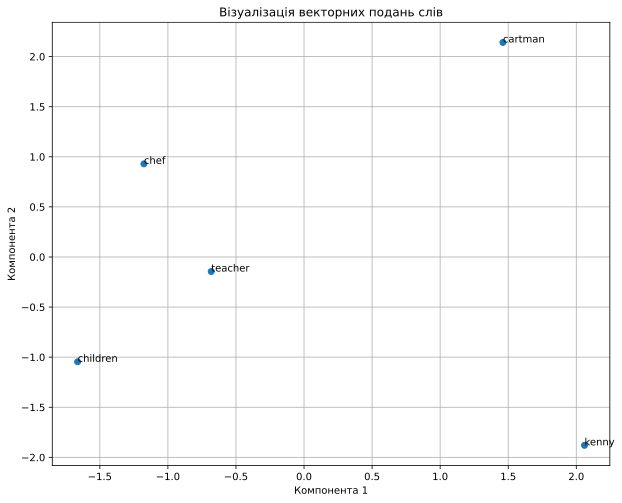

In [59]:
visualize_embeddings(W1.T, ['children', 'chef', 'cartman', 'kenny', 'teacher'])

In [61]:
def save_embeddings(W1, W2, word2Ind, Ind2word, filepath):
    """
    Зберігає векторні подання слів у файл.

    Args:
        W1, W2: Вагові матриці моделі
        word2Ind: Словник {слово: індекс}
        Ind2word: Словник {індекс: слово}
        filepath: Шлях до файлу для збереження
    """
    # Обчислення фінального векторного подання як середнього W1 і W2
    word_embeddings = (W1.T + W2) / 2.0

    # Створення словника {слово: вектор}
    embeddings_dict = {}
    for word, idx in word2Ind.items():
        embeddings_dict[word] = word_embeddings[idx, :]

    # Збереження у файл
    with open(filepath, 'wb') as f:
        pickle.dump({
            'embeddings': embeddings_dict,
            'word2Ind': word2Ind,
            'Ind2word': Ind2word
        }, f)

    print(f"Векторні подання збережено у файл: {filepath}")


In [60]:
def load_embeddings(filepath):
    """
    Завантажує векторні подання слів з файлу.

    Args:
        filepath: Шлях до файлу для завантаження

    Returns:
        embeddings_dict: Словник {слово: вектор}
        word2Ind: Словник {слово: індекс}
        Ind2word: Словник {індекс: слово}
    """
    with open(filepath, 'rb') as f:
        data = pickle.load(f)

    embeddings_dict = data['embeddings']
    word2Ind = data['word2Ind']
    Ind2word = data['Ind2word']

    print(f"Векторні подання завантажено з файлу: {filepath}")
    return embeddings_dict, word2Ind, Ind2word


In [62]:
save_embeddings(W1_trained, W2_trained, word2Ind, Ind2word, 'southpark.pkl')

Векторні подання збережено у файл: southpark.pkl


In [64]:
embeddings_dict, word2Ind_loaded, Ind2word_loaded = load_embeddings('southpark.pkl')

Векторні подання завантажено з файлу: southpark.pkl


In [65]:
print(embeddings_dict['cartman'])

[0.53581456 0.42689624 0.87220299 0.22259344 0.60796211 0.46741796
 0.56319715 0.90916569 0.90918994 0.40142509 0.80384553 0.66383746
 0.36201717 0.18595073 0.69931412 0.29068111 0.42482442 0.47322281
 0.39779674 0.42103819 0.39321712 0.42326818 0.14371918 0.65037505
 0.66422114 0.67972244 0.50440207 0.13934916 0.19429159 0.2432844
 0.35767739 0.65015707 0.38926916 0.67060145 0.4063805  0.41971353
 0.49421083 0.4719099  0.084966   0.73185092 0.33237455 0.6807479
 0.69596789 0.61814687 0.78638616 0.43734441 0.83737342 0.301352
 0.39032575 0.52290859 0.31274346 0.40843047 0.7820036  0.58233898
 0.52610038 0.43837699 0.62848538 0.8808056  0.17206539 0.51245444
 0.51081705 0.36872572 0.93771982 0.51380986 0.10064615 0.13113993
 0.43890101 0.60425499 0.53996847 0.12184946 0.43652642 0.73456403
 0.84627896 0.41019475 0.75594781 0.42512469 0.56035965 0.47974456
 0.88464887 0.76653477 0.51563764 0.38227429 0.73859174 0.52882383
 0.54591    0.84359106 0.59060097 0.86843779 0.67303323 0.72771508

In [77]:
def create_ui(embeddings_dict, word2Ind):
    """
    Створює простий інтерфейс користувача для взаємодії з векторними поданнями.

    Args:
        embeddings_dict: Словник {слово: вектор}
        word2Ind: Словник {слово: індекс}
    """
    # Створення текстового поля для введення слова
    word_input = widgets.Text(
        value='',
        placeholder='Введіть слово...',
        description='Слово:',
        disabled=False
    )

    # Створення кнопки для пошуку найбільш подібних слів
    find_similar_button = widgets.Button(
        description='Знайти подібні слова',
        disabled=False,
        button_style='',
        tooltip='Натисніть для пошуку схожих слів'
    )

    # Створення слайдера для вибору кількості слів для відображення
    top_n_slider = widgets.IntSlider(
        value=5,
        min=1,
        max=20,
        step=1,
        description='Кількість слів:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # Створення області для виведення результатів
    output_area = widgets.Output()

    # Функція для обчислення косинусної схожості між векторами
    def cosine_similarity(vec1, vec2):
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    # Функція для пошуку найбільш подібних слів
    def find_similar_words(word, top_n=5):
        if word not in embeddings_dict:
            return []

        word_vector = embeddings_dict[word]
        similarities = []

        for other_word, other_vector in embeddings_dict.items():
            if other_word != word:
                similarity = cosine_similarity(word_vector, other_vector)
                similarities.append((other_word, similarity))

        # Сортування за спаданням схожості
        similarities.sort(key=lambda x: x[1], reverse=True)

        return similarities[:top_n]

    # Функція для виконання векторної арифметики
    def word_arithmetic(positive_words, negative_words, top_n=5):
        if not all(word in embeddings_dict for word in positive_words + negative_words):
            return []

        # Обчислення результуючого вектора
        result_vector = np.zeros_like(list(embeddings_dict.values())[0])

        for word in positive_words:
            result_vector += embeddings_dict[word]

        for word in negative_words:
            result_vector -= embeddings_dict[word]

        # Нормалізація вектора
        result_vector = result_vector / np.linalg.norm(result_vector)

        # Пошук найбільш подібних слів
        similarities = []

        for word, vector in embeddings_dict.items():
            if word not in positive_words and word not in negative_words:
                similarity = cosine_similarity(result_vector, vector)
                similarities.append((word, similarity))

        # Сортування за спаданням схожості
        similarities.sort(key=lambda x: x[1], reverse=True)

        return similarities[:top_n]

    # Функція-обробник для кнопки пошуку подібних слів
    def on_find_similar_button_clicked(b):
        word = word_input.value.strip().lower()
        top_n = top_n_slider.value

        with output_area:
            clear_output()

            if not word:
                print("Будь ласка, введіть слово.")
                return

            if word not in embeddings_dict:
                print(f"Слово '{word}' не знайдено у словнику.")
                return

            similar_words = find_similar_words(word, top_n)

            print(f"Слова, подібні до '{word}':")
            for i, (similar_word, similarity) in enumerate(similar_words):
                print(f"{i+1}. {similar_word} (схожість: {similarity:.4f})")

    # Створення текстового поля для векторної арифметики
    arithmetic_input = widgets.Text(
        value='',
        placeholder='Приклад: king - man + woman',
        description='Векторна арифметика:',
        disabled=False,
        layout=widgets.Layout(width='500px')
    )

    # Створення кнопки для виконання векторної арифметики
    arithmetic_button = widgets.Button(
        description='Обчислити',
        disabled=False,
        button_style='',
        tooltip='Натисніть для виконання векторної арифметики'
    )

    # Функція-обробник для кнопки векторної арифметики
    def on_arithmetic_button_clicked(b):
        expression = arithmetic_input.value.strip().lower()
        top_n = top_n_slider.value

        with output_area:
            clear_output()

            if not expression:
                print("Будь ласка, введіть вираз для векторної арифметики.")
                return

            try:
                # Парсинг виразу
                positive_words = []
                negative_words = []

                parts = expression.replace('-', '+-').split('+')
                parts = [part.strip() for part in parts if part.strip()]

                for part in parts:
                    if part.startswith('-'):
                        word = part[1:].strip()
                        if word in embeddings_dict:
                            negative_words.append(word)
                        else:
                            print(f"Слово '{word}' не знайдено у словнику.")
                            return
                    else:
                        word = part.strip()
                        if word in embeddings_dict:
                            positive_words.append(word)
                        else:
                            print(f"Слово '{word}' не знайдено у словнику.")
                            return

                if not positive_words and not negative_words:
                    print("Не вдалося розпізнати вираз.")
                    return

                # Виконання арифметики
                result = word_arithmetic(positive_words, negative_words, top_n)

                # Формування виразу для виведення
                expression_text = ' + '.join(positive_words)
                if negative_words:
                    expression_text += ' - ' + ' - '.join(negative_words)

                print(f"Результат для виразу '{expression_text}':")
                for i, (word, similarity) in enumerate(result):
                    print(f"{i+1}. {word} (схожість: {similarity:.4f})")

            except Exception as e:
                print(f"Помилка при обчисленні: {str(e)}")

    # Встановлення обробників подій
    find_similar_button.on_click(on_find_similar_button_clicked)
    arithmetic_button.on_click(on_arithmetic_button_clicked)

    # Візуалізація віджетів
    similar_section = widgets.VBox([
        widgets.Label("Пошук подібних слів:"),
        widgets.HBox([word_input, find_similar_button]),
        top_n_slider
    ])

    arithmetic_section = widgets.VBox([
        widgets.Label("Векторна арифметика:"),
        widgets.HBox([arithmetic_input, arithmetic_button])
    ])

    # Відображення інтерфейсу
    display(widgets.VBox([
        similar_section,
        widgets.HTML("<hr>"),
        arithmetic_section,
        widgets.HTML("<hr>"),
        output_area
    ]))


In [79]:
embeddings_dict, word2Ind_loaded, Ind2word_loaded = load_embeddings('southpark.pkl')
create_ui(embeddings_dict, word2Ind)

Векторні подання завантажено з файлу: southpark.pkl


In [80]:
csv_data = pandas.read_csv('/content/SouthParkData/All-seasons.csv')
corpus = ' '.join(csv_data['Line'].dropna().astype(str))

# Токенізація та очищення тексту
words = tokenize(corpus)

# Виведення інформації про корпус
print(f"Кількість токенів: {len(words)}")
print(f"Приклад токенів: {words[:15]}")

# Створення словників для індексації слів
word2Ind, Ind2word = get_dict(words)
V = len(word2Ind)
print(f"Розмір словника: {V}")

# Розрахунок частотного розподілу слів
word_freq = Counter(words)
print("Найбільш часті слова:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


Кількість токенів: 994021
Приклад токенів: ['you', 'guys', '.', 'you', 'guys', '.', 'chef', 'is', 'going', 'away', '.', 'going', 'away', '.', 'for']
Розмір словника: 23846
Найбільш часті слова:
.: 188848
you: 29070
the: 25170
i: 24802
to: 19800
a: 15178
it: 14613
and: 13489
we: 12786
that: 11978
is: 10542
do: 9567
of: 9375
what: 8311
in: 7414
this: 6871
have: 6367
all: 6083
on: 6038
are: 5730


In [81]:

# Встановлення параметрів моделі
C = 2                  # Половина розміру вікна контексту
N = 50                 # Розмірність прихованого шару (розмір векторних подань)
num_iters = 500        # Кількість ітерацій
alpha = 0.03           # Швидкість навчання
batch_size = 128       # Розмір батчу

# Навчання моделі
print("Початок навчання моделі...")
W1, W2, b1, b2 = gradient_descent(words, word2Ind, N, V, num_iters, alpha, batch_size, C)
print("Навчання завершено!")

# Обчислення остаточних векторних подань (W3)
word_embeddings = (W1.T + W2) / 2.0

# Збереження векторних подань у файл
save_embeddings(W1, W2, word2Ind, Ind2word, 'word_embeddings.pkl')


Початок навчання моделі...
Ітерація: 10, витрати: 11.773933
Ітерація: 20, витрати: 10.996293
Ітерація: 30, витрати: 10.479056
Ітерація: 40, витрати: 9.940257
Ітерація: 50, витрати: 9.874032
Ітерація: 60, витрати: 9.546444
Ітерація: 70, витрати: 9.473750
Ітерація: 80, витрати: 9.958183
Ітерація: 90, витрати: 9.487860
Ітерація: 100, витрати: 9.351967
Ітерація: 110, витрати: 8.869586
Ітерація: 120, витрати: 9.334471
Ітерація: 130, витрати: 8.823526
Ітерація: 140, витрати: 9.121771
Ітерація: 150, витрати: 8.059828
Ітерація: 160, витрати: 8.457467
Ітерація: 170, витрати: 8.443946
Ітерація: 180, витрати: 8.428660
Ітерація: 190, витрати: 9.206253
Ітерація: 200, витрати: 9.035877
Ітерація: 210, витрати: 9.097799
Ітерація: 220, витрати: 8.052570
Ітерація: 230, витрати: 9.355135
Ітерація: 240, витрати: 8.791267
Ітерація: 250, витрати: 8.524629
Ітерація: 260, витрати: 8.385279
Ітерація: 270, витрати: 8.542487
Ітерація: 280, витрати: 8.833960
Ітерація: 290, витрати: 8.308529
Ітерація: 300, витрати

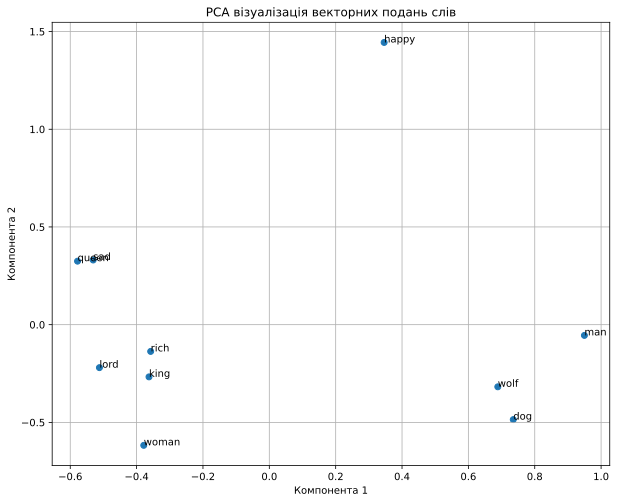

king - man + woman = ?
woman: 0.8837
king: 0.8741
dwarfs: 0.8613
grat: 0.8543
brit: 0.8514


In [82]:
# Список слів для візуалізації
words_to_visualize = ['king', 'queen', 'lord', 'man', 'woman', 'dog', 'wolf', 'rich', 'happy', 'sad']

# Індекси вибраних слів
idx = [word2Ind[word] for word in words_to_visualize]

# Вибір відповідних векторних подань
X = word_embeddings[idx, :]

# Візуалізація за допомогою PCA
result = compute_pca(X, 2)
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("PCA візуалізація векторних подань слів")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# Дослідження векторної арифметики
def find_closest_words(embedding, embeddings_dict, top_n=5):
    """
    Знаходить найближчі слова до заданого вектора.
    """
    similarities = []
    for word, vector in embeddings_dict.items():
        sim = np.dot(embedding, vector) / (np.linalg.norm(embedding) * np.linalg.norm(vector))
        similarities.append((word, sim))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Словник векторних подань
embeddings_dict = {word: word_embeddings[word2Ind[word]] for word in word2Ind}

# Приклад векторної арифметики: king - man + woman = ?
king_vec = embeddings_dict['king']
man_vec = embeddings_dict['man']
woman_vec = embeddings_dict['woman']

result_vec = king_vec - man_vec + woman_vec
closest_words = find_closest_words(result_vec, embeddings_dict)

print("king - man + woman = ?")
for word, sim in closest_words:
    print(f"{word}: {sim:.4f}")


In [83]:
# Завантаження збережених векторних подань (якщо потрібно)
# embeddings_dict, word2Ind, Ind2word = load_embeddings('word_embeddings.pkl')

# Створення інтерфейсу користувача
create_ui(embeddings_dict, word2Ind)
